<a href="https://colab.research.google.com/github/fnsalamaa/FINA-SALAMA-PCVK/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**✩˚｡⋆ WEEK 10 PCVK ✩˚｡⋆**

### Name : Fina Salama Qowlam Hareny

#### No    : 08 / 2141720164

####Class : TI-3I

----
##**⋰˚☆ MODULE 10 ⋰˚☆**
###**Thresholding, Simple Segmentation**


In [ ]:
from google.colab import drive

# Acessing Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import the following libraries that will be used during the following week 10 practicum
trial.**

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from PIL import Image


**3. Manually create a Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO,
TOZERO_INV) according to the description from the chart shown above.**

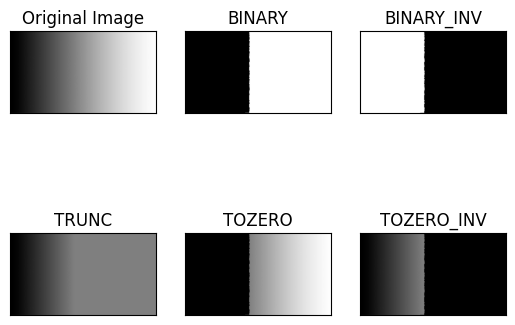

In [ ]:
# Load the Gradient image
img = cv2.imread('/content/drive/MyDrive/PCVK/gradient.jpg')

thresh = 127 #specified Threshold value

# 1. thresh1 if the pixel in img>127, then thresh1 has a value of 1 (white) otherwise it is worth 0 (black)
ret,thresh1 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY)

# 2. thresh2 is an inverse binary threshold
ret,thresh2 = cv2.threshold(img,thresh,255,cv2.THRESH_BINARY_INV)

# 3. Threshold Truncate
ret,thresh3 = cv2.threshold(img,thresh,255,cv2.THRESH_TRUNC)

# 4. Threshold Tozero
ret,thresh4 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO)

# 5. Threshold Tozero Inverse
ret,thresh5 = cv2.threshold(img,thresh,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', vmin=0,vmax=255)
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

**4. Create Otsu Thresholding without using the Library. Also display the threshold value
when you use Otsu's, as shown in the following image . (use the *image lena_gs_lc2.jpg* so that it really looks different between the otsu's results and
the usual global threshold)**

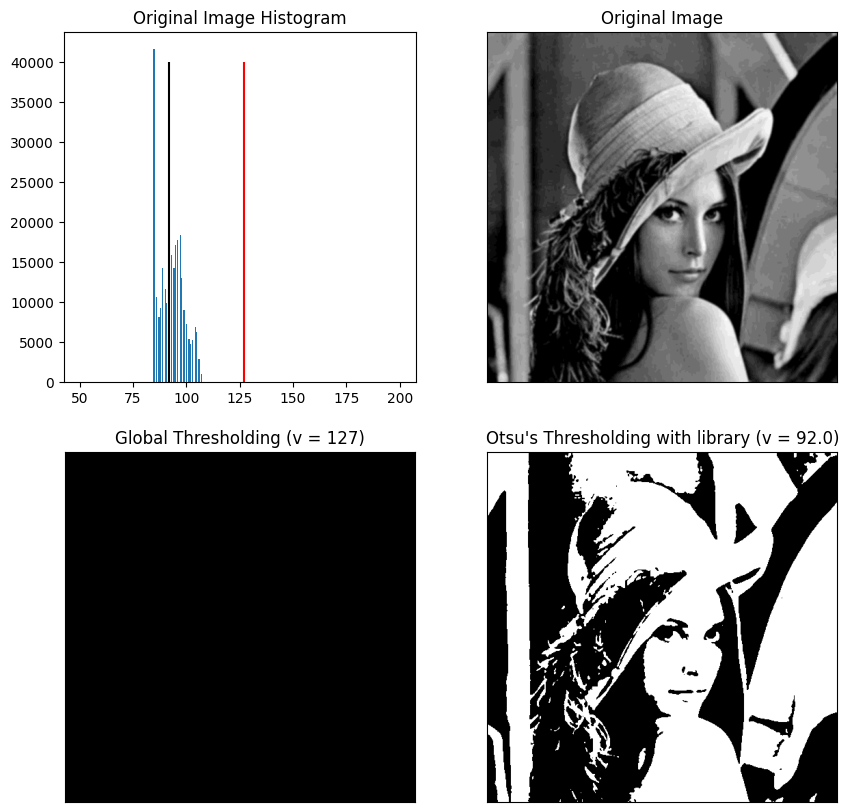

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/lena_gs_lc2.jpg')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
x = ("Otsu's Thresholding with library (v = ")+str(ret2)+")"
titles = ['Original Image', 'Global Thresholding (v = 127)', x]
image3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #red vertical line shows global threshold 127
plt.vlines(ret2,0,40000,colors='black') #black vertical line indicates threshold 92 otsu's results
plt.title('Original Image Histogram')

for i in range(len(image3)):
  plt.subplot(2,2,i+2),plt.imshow(image3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

5. Create a histogram from a segmented image, the histogram is only in the foreground
image. Use the Lily or Leaves image provided in the images folder .
Instructions:

- You can use cv.calcHist to display a histogram.
- Open the folloiwng link https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- From the link, note that cv.calcHist has one of the parameters, namely mask.
If set to None, the entire image histogram will be counted. If we specify a mask,
only the part of the image masked in white will be calculated for the histogram
(from the example below it is called Image Segment).

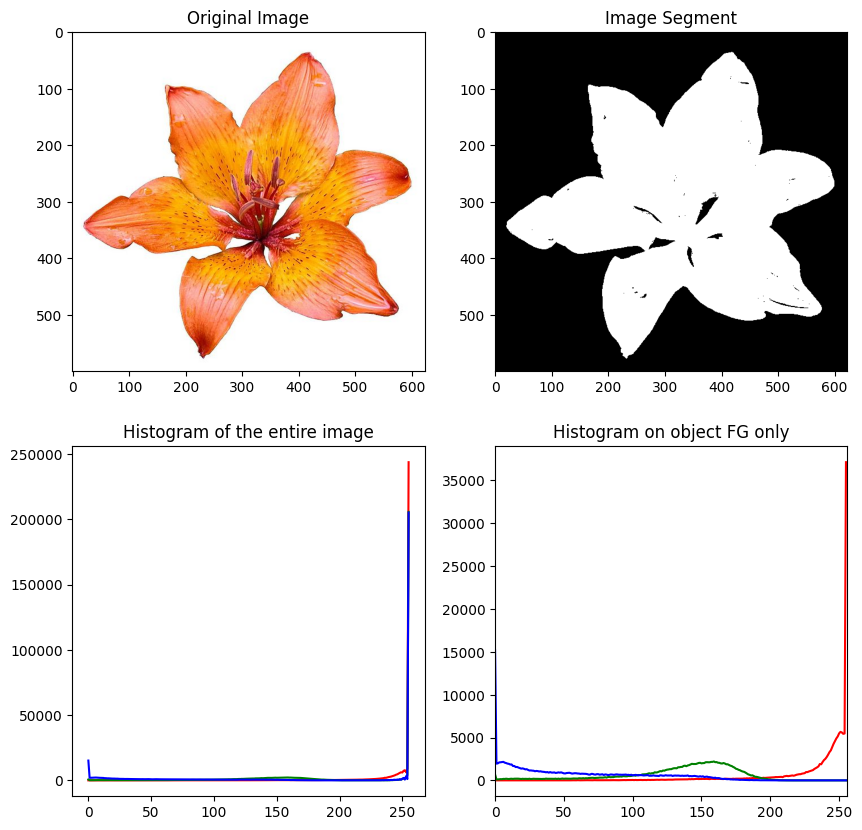

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/lily.jpg')
img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Original Image')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Image Segment')
color = ('r','g','b')
for i,col in enumerate(color):
     hist0, bins = np.histogram(img[:,:,i].ravel(),256,[0,256])
     plt.subplot(2,2,3),plt.plot(hist0,color = col)
     plt.title('Histogram of the entire image')
     hist1, bins = np.histogram(img[:,:,i][mask==255].ravel(),256,[0,256])
     plt.subplot(2,2,4),plt.plot(hist1,color = col)
     plt.title('Histogram on object FG only')
     plt.xlim([0,256])
plt.show()

6. Perform color segmentation on the image "peppers.jpg", display only yellow
colors . (Hint: you can use K-Means to display only certain colors)

**When you display a certain color, explain the problem you are facing and why it happened.**

7. Open the crossword.jpg file. With the knowledge of thresholding that you have
learned. Perform binary thresholding with the best results in your opinion. Copy the
code and image results in this module.

8. Create Otsu Thresholding without using the Library. Also display the threshold value
when you use Otsu's, as shown in the following results image. (use image **ktp Riyanto.jpg** to see the difference between Otsu's results and the usual global threshold)

In [ ]:
!pip install pytesseract
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,098 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [ ]:

import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

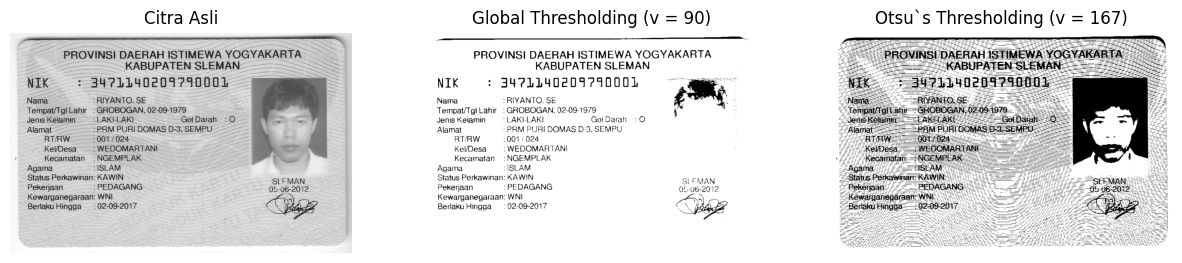

In [ ]:
filename = '/content/drive/MyDrive/PCVK/ktpriyanto.png'
# Load the image in grayscale
image = cv2.imread(filename, 0)

# Compute histogram and probabilities of each intensity level
histogram = np.histogram(image, bins=256, range=(0, 256), density=True)[0]
total_pixels = image.shape[0] * image.shape[1]
probabilities = histogram / total_pixels

# Initialize variables
maximum_variance = 0
optimal_threshold = 0

# Iterate over all possible threshold values
for t in range(256):
    # Calculate weights and means
    w0 = np.sum(probabilities[:t])
    w1 = np.sum(probabilities[t:])
    mean0 = np.sum(np.arange(t) * probabilities[:t]) / w0 if w0 > 0 else 0
    mean1 = np.sum(np.arange(t, 256) * probabilities[t:]) / w1 if w1 > 0 else 0

    # Calculate between-class variance
    variance = w0 * w1 * (mean0 - mean1) ** 2

    # Update maximum variance and optimal threshold
    if variance > maximum_variance:
        maximum_variance = variance
        optimal_threshold = t

# Apply thresholding
thresholded_image = (image > 90) * 255
optimal_thresholded_image = (image > optimal_threshold) * 255

# Display the results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Global Thresholding (v = 90)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(optimal_thresholded_image, cmap='gray')
plt.title(f'Otsu`s Thresholding (v = {optimal_threshold})')
plt.axis('off')

plt.show()

9. Create a histogram from the segmented image, Histogram only on the foreground image
just. Use the Riyanto.jpg ID card image provided in the images folder.
Instruction:
- you can use cv.calcHist to display a histogram.
- Open the following link https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html
- From the link note that cv.calcHist has one of the parameters namely masks. If set to None, then the entire image will be counted
the histogram. If we specify a mask, then only part of the image is visible
masked in white for which the histogram will be calculated (from the example
below is called Image Segment).

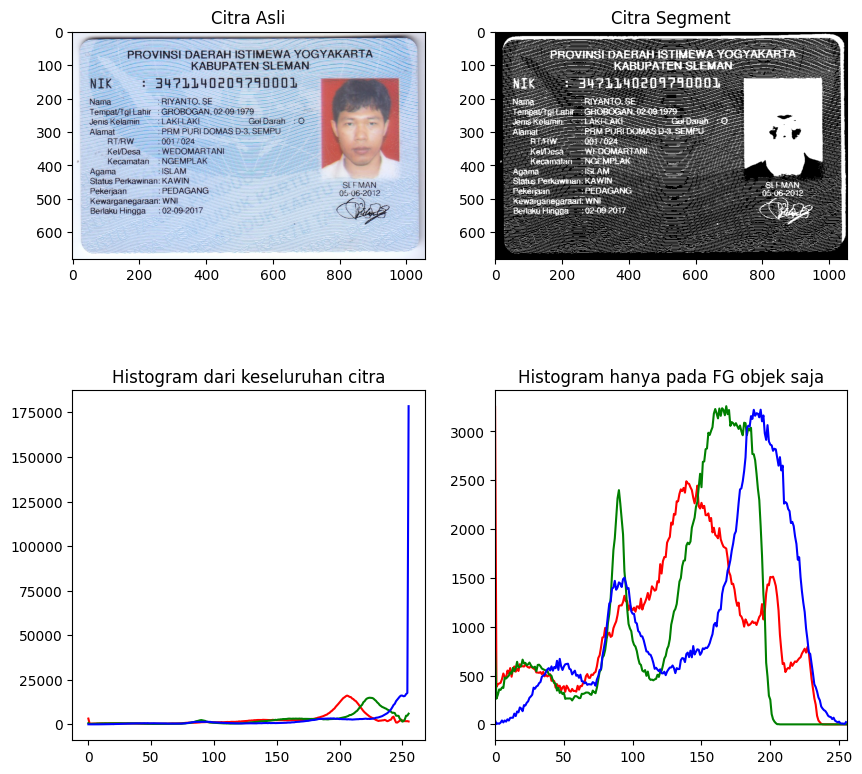

In [ ]:
filename = '/content/drive/MyDrive/PCVK/ktpriyanto.png'

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret3, mask = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2, 2, 2), plt.imshow(mask, 'gray')
plt.title('Citra Segment')

color = ('r', 'g', 'b')
for i, col in enumerate(color):
    hist0 = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.subplot(2, 2, 3), plt.plot(hist0, color=col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img], [i], mask, [256], [0, 256])
    plt.subplot(2, 2, 4), plt.plot(hist1, color=col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0, 256])

plt.show()


6. Perform color segmentation on the image "ktp Riyanto.jpg", displaying only color
just the blue one. (Hint: you can use K-Means to display only
certain colors only)

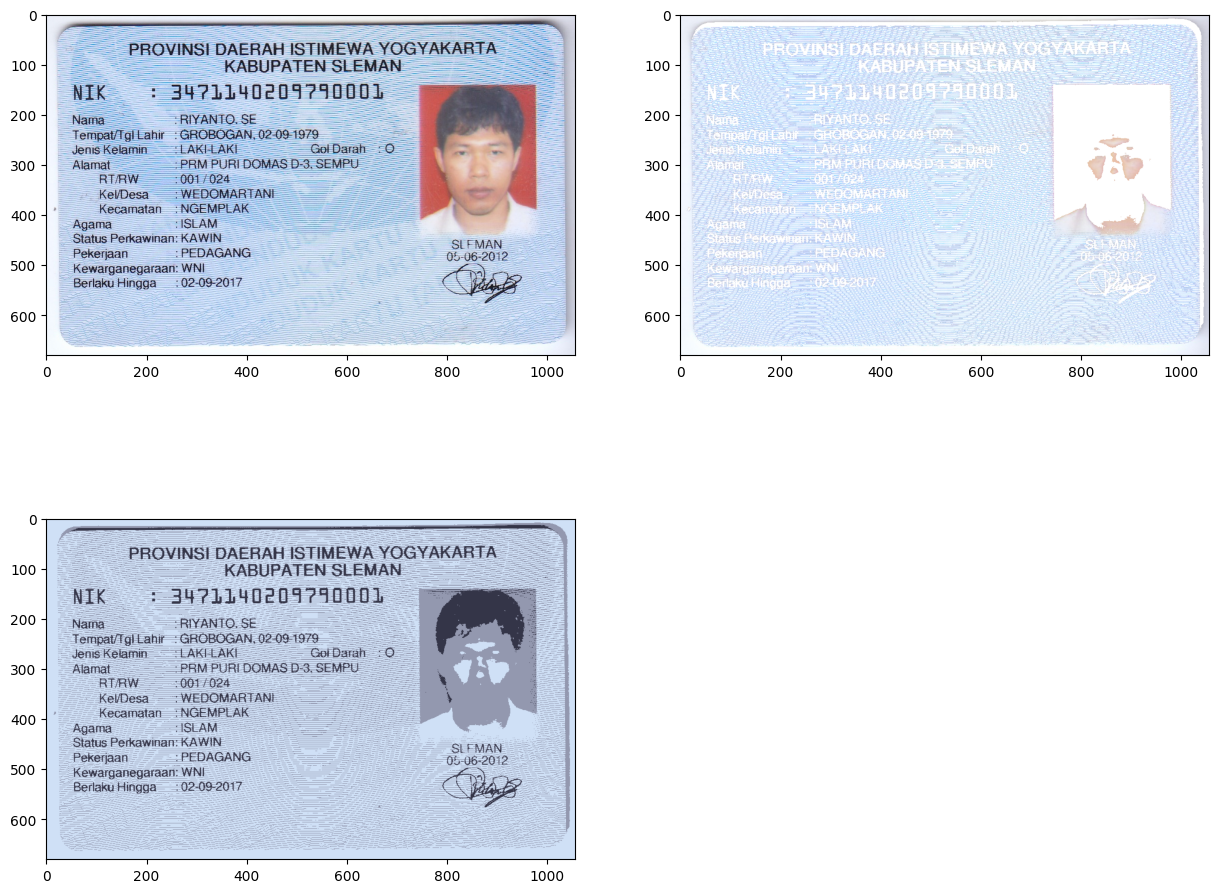

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/PCVK/ktpriyanto.png'

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)

k = 3
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
labels = labels.flatten()
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.subplot(2, 2, 2), plt.imshow(masked_image0)
plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.show()
